In [5]:
import pandas as pd


In [6]:
filelist = ['birth.csv', 'breed.csv', 'report.csv', 'spec.csv','submission.csv']

# Read File

In [7]:
birth = pd.read_csv('./data/' + filelist[0])
breed = pd.read_csv('./data/' + filelist[1])
report = pd.read_csv('./data/' + filelist[2])
spec = pd.read_csv('./data/' + filelist[3])
submission = pd.read_csv('./data/' + filelist[4])
submission

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,1
0,480,NaN
1,742,NaN
2,743,NaN
3,744,NaN
4,745,NaN
...,...,...
4258,37481,NaN
4259,37482,NaN
4260,37483,NaN
4261,37484,NaN


# Change Index

In [8]:
birth_index = ['乳牛編號', '分娩日期', '乾乳日期','犢牛編號1','犢牛編號2','母牛體重','登錄日期','計算胎次','胎次','分娩難易度','犢牛體型','犢牛性別','酪農場代號']
report_index = ['ID','資料年度','資料月份','酪農場代號','乳牛編號','父親精液編號','母親乳牛編號','出生日期','胎次','泌乳天數','乳量','最近分娩日期','採樣日期','月齡','檢測日期','最後配種日期','最後配種精液','配種次數','前次分娩日期','第一次配種日期','第一次配種精液']
breed_index = ['乳牛編號','配種日期','配種精液','登錄日期','孕檢','配種方式','精液種類','酪農場代號']
spec_index = ['乳牛編號','狀況類別','狀況代號','狀況日期','備註','登錄日期','酪農場代號']
birth.columns = birth_index
report.columns = report_index
breed.columns = breed_index
spec.columns = spec_index
birth.fillna(-1,inplace = True)
report.fillna(-1,inplace = True)
breed.fillna(-1, inplace = True)
spec.fillna(-1, inplace = True)
breed

,乳牛編號,配種日期,配種精液,登錄日期,孕檢,配種方式,精液種類,酪農場代號
0,11361,2005/9/2 00:00,1H5506,2005/9/28 00:00,0,-1,-1,A
1,11469,2000/1/17 00:00,72H896,2000/1/31 00:00,0,-1,-1,A
2,11930,2000/5/12 00:00,9H2164,2000/5/22 00:00,0,-1,-1,A
3,11930,2000/5/26 00:00,1H2993,2000/7/6 00:00,0,-1,-1,A
4,11930,2000/7/4 00:00,14H2403,1988/7/29 00:00,0,-1,-1,A
...,...,...,...,...,...,...,...,...
21045,6187429,2019/7/17 00:00,001HO12901,2019/7/26 00:00,0,-1,-1,C
21046,6187431,2019/7/24 00:00,001HO12901,2019/7/26 00:00,0,-1,-1,C
21047,6187441,2019/7/14 00:00,001HO12901,2019/7/26 00:00,0,-1,-1,C
21048,6187442,2019/7/17 00:00,001HO12901,2019/7/26 00:00,0,-1,-1,C


# Split into Train and Test dataframe

In [22]:
Train_ID = [rep_val for rep_val in report['ID'].values if rep_val not in submission['ID'].values]
Train_report = report.loc[report['ID'].isin(Train_ID)]
Train_Number = Train_report['乳牛編號'].values
Train_report['ID'].values
#Train_breed = breed.loc[breed['乳牛編號'].isin(Train_Number)]
#breed

array([    1,     2,     3, ..., 37515, 37516, 37517], dtype=int64)

In [23]:
Test_ID = [rep_val for rep_val in report['ID'].values if rep_val in submission['ID'].values]
Test_report = report.loc[report['ID'].isin(Test_ID)]
Test_Number = Test_report['乳牛編號'].values
Test_report
#Test_breed = breed.loc[breed['乳牛編號'].isin(Test_Number)]
#Test_breed

,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親精液編號,母親乳牛編號,出生日期,胎次,泌乳天數,...,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,最後配種精液,配種次數,前次分娩日期,第一次配種日期,第一次配種精液
479,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2017/11/1 00:00,2019/1/10 00:00,94,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276
741,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019/1/29 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695
742,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019/1/29 00:00,2019/3/5 00:00,95,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
743,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019/1/29 00:00,2019/4/9 00:00,96,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
744,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019/1/29 00:00,2019/5/7 00:00,97,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,37481,2019,6,C,6187446,001HO11511,4.17046e+06,2017/6/1 00:00,1,15.0,...,2019/6/10 00:00,2019/6/25 00:00,24,2019/6/27 00:00,2019/7/24 00:00,001HO12901,0,-1,2019/7/24 00:00,001HO12901
37481,37482,2019,6,C,6187448,001HO11511,3.17231e+06,2017/6/17 00:00,1,22.0,...,2019/6/3 00:00,2019/6/25 00:00,24,2019/6/27 00:00,-1,-1,0,-1,-1,-1
37482,37483,2019,6,C,6187449,001HO11511,2.17684e+06,2017/8/10 00:00,1,21.0,...,2019/6/4 00:00,2019/6/25 00:00,22,2019/6/27 00:00,-1,-1,0,-1,-1,-1
37483,37484,2019,7,C,6187449,001HO11511,2.17684e+06,2017/8/10 00:00,1,51.0,...,2019/6/4 00:00,2019/7/25 00:00,23,2019/7/26 00:00,-1,-1,0,-1,-1,-1


# Extract features

In [24]:
report_drop_columns = ['ID','資料年度','資料月份','父親精液編號','母親乳牛編號','出生日期','最近分娩日期','採樣日期','檢測日期'
               ,'最後配種日期','最後配種精液','前次分娩日期','第一次配種日期','第一次配種精液']
Test_report_drop_columns = ['資料年度','資料月份','父親精液編號','母親乳牛編號','出生日期','最近分娩日期','採樣日期','檢測日期'
               ,'最後配種日期','最後配種精液','前次分娩日期','第一次配種日期','第一次配種精液']
mapping = {'A' : 0, 'B':1,'C':2}
Train_report_x = Train_report.drop(columns=report_drop_columns, axis = 1)
Train_report_x['酪農場代號'] = Train_report_x['酪農場代號'].map(mapping)
Test_report_x = Test_report.drop(columns=Test_report_drop_columns, axis = 1)
Test_report_x['酪農場代號'] = Test_report_x['酪農場代號'].map(mapping)
Test_report_x

,ID,酪農場代號,乳牛編號,胎次,泌乳天數,乳量,月齡,配種次數
479,480,0,52631,4,435.0,-1.0,94,6
741,742,0,52640,4,13.0,-1.0,94,0
742,743,0,52640,4,35.0,-1.0,95,1
743,744,0,52640,4,70.0,-1.0,96,1
744,745,0,52640,4,98.0,-1.0,97,1
...,...,...,...,...,...,...,...,...
37480,37481,2,6187446,1,15.0,-1.0,24,0
37481,37482,2,6187448,1,22.0,-1.0,24,0
37482,37483,2,6187449,1,21.0,-1.0,22,0
37483,37484,2,6187449,1,51.0,-1.0,23,0


In [25]:
breed_drop_columns = ['配種日期','配種精液','登錄日期']
breed_x = breed.drop(columns=breed_drop_columns, axis = 1)
breed_x['配種方式'] = pd.Categorical(breed_x['配種方式']).codes
breed_x['精液種類'] = pd.Categorical(breed_x['精液種類']).codes
breed_x['酪農場代號'] = breed_x['酪農場代號'].map(mapping)
Train_breed_x = breed_x.loc[breed_x['乳牛編號'].isin(Train_Number)]
Test_breed_x = breed_x.loc[breed_x['乳牛編號'].isin(Test_Number)]
Test_breed_x

,乳牛編號,孕檢,配種方式,精液種類,酪農場代號
7576,95121878,0,0,0,1
7577,95121878,0,0,0,1
7578,95121878,0,0,0,1
8383,97051427,0,0,0,0
8384,97051427,0,0,0,0
...,...,...,...,...,...
21045,6187429,0,0,0,2
21046,6187431,0,0,0,2
21047,6187441,0,0,0,2
21048,6187442,0,0,0,2


In [47]:
# birth feature
birth_drop_columns = ['分娩日期', '乾乳日期', '犢牛編號1', '犢牛編號2', '登錄日期', '計算胎次', '犢牛體型', '犢牛性別']
birth_x = birth.drop(columns=birth_drop_columns, axis = 1)
# birth_x.describe(include = ['O'])
birth_x['酪農場代號'] = birth_x['酪農場代號'].map(mapping)
Train_birth_x = birth_x.loc[birth_x['乳牛編號'].isin(Train_Number)]
Test_birth_x = birth_x.loc[birth_x['乳牛編號'].isin(Test_Number)]
Train_birth_x

,乳牛編號,母牛體重,胎次,分娩難易度,酪農場代號
0,87121677,-1.0,2,1.0,1
1,96126940,522.0,2,2.0,1
2,95181708,670.0,5,1.0,2
3,97127665,-1.0,3,2.0,1
4,97182634,630.0,4,1.0,2
...,...,...,...,...,...
3755,4181793,590.0,2,3.0,2
3756,5184341,560.0,2,1.0,2
3757,5184348,580.0,2,1.0,2
3758,97182634,730.0,9,1.0,2


# Quantify features

In [ ]:
# def season(time):
#     if len(item) == 0:
#         return 0
#     temp = int(item.split('/')[1])
#     if temp >= 1 and temp <= 3:
#         return '春'
#     elif temp >= 4 and temp <= 6:
#         return '夏'
#     elif temp >= 7 and temp <= 9:
#         return '秋'
#     elif temp >= 10 and temp <= 12:
#         return '冬'
#     else:
#         return 0

In [21]:
# for i, item in enumerate(birth['分娩日期']):
#     birth.loc[i, '分娩日期'] = season(item)
# birth

In [253]:
# res = pd.merge(birth, breed, on = '乳牛編號')
# res = pd.merge(res, report, on = '乳牛編號')
# res = pd.merge(res, spec, on = '乳牛編號')
# res['分娩日期'][1]

# Data Normalization

# Merge Data

In [51]:
x = pd.merge(Train_report_x, Train_breed_x, on = '乳牛編號')
x = pd.merge(x, Train_birth_x, on = '乳牛編號')
y = x['乳量'].values
x = x.drop(columns = ['乳牛編號','乳量'], axis = 1)
#res
x

,酪農場代號_x,胎次_x,泌乳天數,月齡,配種次數,孕檢,配種方式,精液種類,酪農場代號_y,母牛體重,胎次_y,分娩難易度,酪農場代號
0,0,1,78.0,26,1,0,0,0,0,-1.0,1,-1.0,0
1,0,1,78.0,26,1,0,0,0,0,-1.0,2,-1.0,0
2,0,1,78.0,26,1,0,0,0,0,-1.0,1,-1.0,0
3,0,1,78.0,26,1,0,0,0,0,-1.0,2,-1.0,0
4,0,1,78.0,26,1,0,0,0,0,-1.0,1,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803852,2,8,229.0,137,0,0,0,0,2,725.0,8,1.0,2
803853,2,8,229.0,137,0,0,0,0,2,725.0,8,1.0,2
803854,2,8,229.0,137,0,0,0,0,2,725.0,8,1.0,2
803855,2,8,229.0,137,0,0,0,0,2,725.0,8,1.0,2


# Define Model

In [52]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
svr = SVR()
regr = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Train Model

In [54]:
# svr.fit(x,y)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=1)
regr.fit(X_train, y_train)
len(X_test)

Iteration 1, loss = 36.67396600
Iteration 2, loss = 20.92514193
Iteration 3, loss = 19.88537363
Iteration 4, loss = 19.38915503
Iteration 5, loss = 19.11402138
Iteration 6, loss = 18.93396184
Iteration 7, loss = 18.90150689
Iteration 8, loss = 18.81798314
Iteration 9, loss = 18.73354142
Iteration 10, loss = 18.68855494
Iteration 11, loss = 18.69053778
Iteration 12, loss = 18.64836176
Iteration 13, loss = 18.61026827
Iteration 14, loss = 18.57007704
Iteration 15, loss = 18.52570623
Iteration 16, loss = 18.54589386
Iteration 17, loss = 18.48202133
Iteration 18, loss = 18.40053993
Iteration 19, loss = 18.39133095
Iteration 20, loss = 18.37095700
Iteration 21, loss = 18.33615874
Iteration 22, loss = 18.31029705
Iteration 23, loss = 18.27671299
Iteration 24, loss = 18.25404248
Iteration 25, loss = 18.25103029
Iteration 26, loss = 18.22314418
Iteration 27, loss = 18.20028781
Iteration 28, loss = 18.16687921
Iteration 29, loss = 18.13323455
Iteration 30, loss = 18.09710231
Iteration 31, loss 

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


200965

# Validation

In [55]:
# predict = svr.predict(x)
# svr.score(x,y)
predict = regr.predict(X_test)
regr.score(X_test,y_test)

0.5686501389054155

Text(0, 0.5, 'Measured')

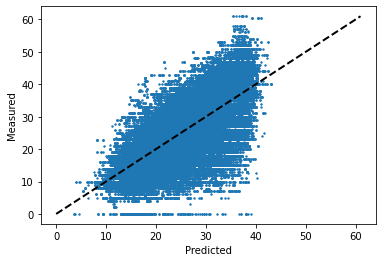

In [56]:
plt.scatter(predict,y_test,s=2)
#plt.plot(predict_y, predict_y, 'ro')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [57]:
# The mean squared error
from math import sqrt

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, predict)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, predict))

Root mean squared error: 5.88
Mean absolute error: 4.49
R-squared: 0.57


# Test

In [58]:
x = pd.merge(Test_report_x, Test_breed_x, on = '乳牛編號', how = 'left')
x = pd.merge(x, Test_birth_x, on = '乳牛編號', how = 'left')
x.fillna(-1,inplace = True)
x_without_ID = x.drop(columns = ['乳牛編號','乳量','ID'], axis = 1)

In [59]:
predict = regr.predict(x_without_ID)
val = pd.DataFrame({'預測乳量':predict})
x = x.join(val)
x_group = x.groupby(['ID']).mean()
x_index = list(range(0,x_group.shape[0]))
x_group.index

Int64Index([  480,   742,   743,   744,   745,   793,   794,   800,   801,
              802,
            ...
            37476, 37477, 37478, 37479, 37480, 37481, 37482, 37483, 37484,
            37485],
           dtype='int64', name='ID', length=4263)

Text(0, 0.5, 'predict value')

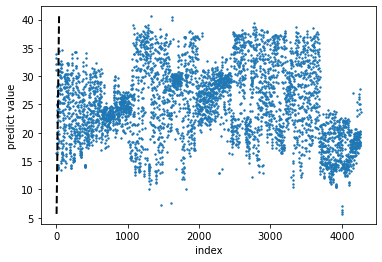

In [60]:
plt.scatter(x_index,x_group['預測乳量'].values,s=2)
#plt.plot(predict_y, predict_y, 'ro')
plt.plot([x_group['預測乳量'].values.min(), x_group['預測乳量'].values.max()], 
         [x_group['預測乳量'].values.min(),x_group['預測乳量'].values.max()], 'k--', lw=2)
plt.xlabel('index')
plt.ylabel('predict value')

In [61]:
for index in range(x_group.shape[0]):
    submission.loc[index, ['1']] = x_group['預測乳量'].values[index]
submission

,ID,1
0,480,16.387284
1,742,31.072212
2,743,33.913891
3,744,33.181760
4,745,32.102208
...,...,...
4258,37481,18.247766
4259,37482,25.062282
4260,37483,24.282699
4261,37484,27.684926


In [62]:
submission.columns = ['ID','預測乳量']

In [63]:
submission.to_csv('result.csv',index = False)